In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('MADRID_LIMPIO.csv')
madrid_variables=df[["host_response_rate", "host_acceptance_rate", "host_total_listings_count", "latitude", "accommodates", "bathrooms","minimum_nights","number_of_reviews","bedrooms", "reviews_per_month" , "price"]]
madrid_variables.head()

<ipython-input-2-d28c8a3b0235>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('MADRID_LIMPIO.csv')


,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,accommodates,bathrooms,minimum_nights,number_of_reviews,bedrooms,reviews_per_month,price
0,100%,100%,1.0,40.4069796,2.0,1.0,1.0,2.0,1.0,0.61,68.0
1,0%,57%,4.0,40.3921,2.0,1.0,1.0,3.0,1.0,0.28,16.0
2,100%,100%,2.0,40.39511,1.0,1.0,1.0,186.0,2.0,5.40,25.0
3,SIN INFORMACIÓN,33%,1.0,40.39555483922258,3.0,1.0,2.0,1.0,1.0,0.14,26.0
4,SIN INFORMACIÓN,SIN INFORMACIÓN,4.0,40.43045,1.0,1.0,7.0,0.0,1.0,1.90,100.0


In [3]:
madrid_variables['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%', ''), errors='coerce')
madrid_variables['host_response_rate'] = madrid_variables['host_response_rate'] / 100

madrid_variables['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'].str.replace('%', ''), errors='coerce')
madrid_variables['host_acceptance_rate'] = madrid_variables['host_acceptance_rate'] / 100

madrid_variables['host_total_listings_count'] = pd.to_numeric(madrid_variables['host_total_listings_count'], errors='coerce')
madrid_variables['accommodates'] = pd.to_numeric(madrid_variables['accommodates'], errors='coerce')
madrid_variables['price'] = pd.to_numeric(madrid_variables['price'], errors='coerce')
madrid_variables['bathrooms'] = pd.to_numeric(madrid_variables['bathrooms'], errors='coerce')
madrid_variables['minimum_nights'] = pd.to_numeric(madrid_variables['minimum_nights'], errors='coerce')
madrid_variables['bedrooms'] = pd.to_numeric(madrid_variables['bedrooms'], errors='coerce')
madrid_variables['latitude'] = pd.to_numeric(madrid_variables['latitude'], errors='coerce')


madrid_variables["host_response_rate"] = madrid_variables["host_response_rate"].fillna(round(madrid_variables["host_response_rate"].mean(), 1))
madrid_variables["host_acceptance_rate"] = madrid_variables["host_acceptance_rate"].fillna(round(madrid_variables["host_acceptance_rate"].mean(), 1))
madrid_variables["host_total_listings_count"] = madrid_variables["host_total_listings_count"].fillna(round(madrid_variables["host_total_listings_count"].mean(), 1))
madrid_variables["accommodates"] = madrid_variables["accommodates"].fillna(round(madrid_variables["accommodates"].mean(), 1))
madrid_variables["reviews_per_month"] = madrid_variables["reviews_per_month"].fillna(round(madrid_variables["reviews_per_month"].mean(), 1))
madrid_variables["price"] = madrid_variables["price"].fillna(round(madrid_variables["price"].mean(), 1))
madrid_variables["bathrooms"] = madrid_variables["bathrooms"].fillna(round(madrid_variables["bathrooms"].mean(), 1))
madrid_variables["minimum_nights"] = madrid_variables["minimum_nights"].fillna(round(madrid_variables["minimum_nights"].mean(), 1))
madrid_variables["bedrooms"] = madrid_variables["bedrooms"].fillna(round(madrid_variables["bedrooms"].mean(), 1))
madrid_variables["number_of_reviews"] = madrid_variables["number_of_reviews"].fillna(round(madrid_variables["number_of_reviews"].mean(), 1))
madrid_variables["latitude"] = madrid_variables["latitude"].fillna(round(madrid_variables["latitude"].mean(), 1))



<ipython-input-3-6a07af302797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_variables['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%', ''), errors='coerce')
<ipython-input-3-6a07af302797>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_variables['host_response_rate'] = madrid_variables['host_response_rate'] / 100
<ipython-input-3-6a07af302797>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [5]:
madrid_variables.isnull().sum()

,0
host_response_rate,0
host_acceptance_rate,0
host_total_listings_count,0
latitude,0
accommodates,0
bathrooms,0
minimum_nights,0
number_of_reviews,0
bedrooms,0
reviews_per_month,0


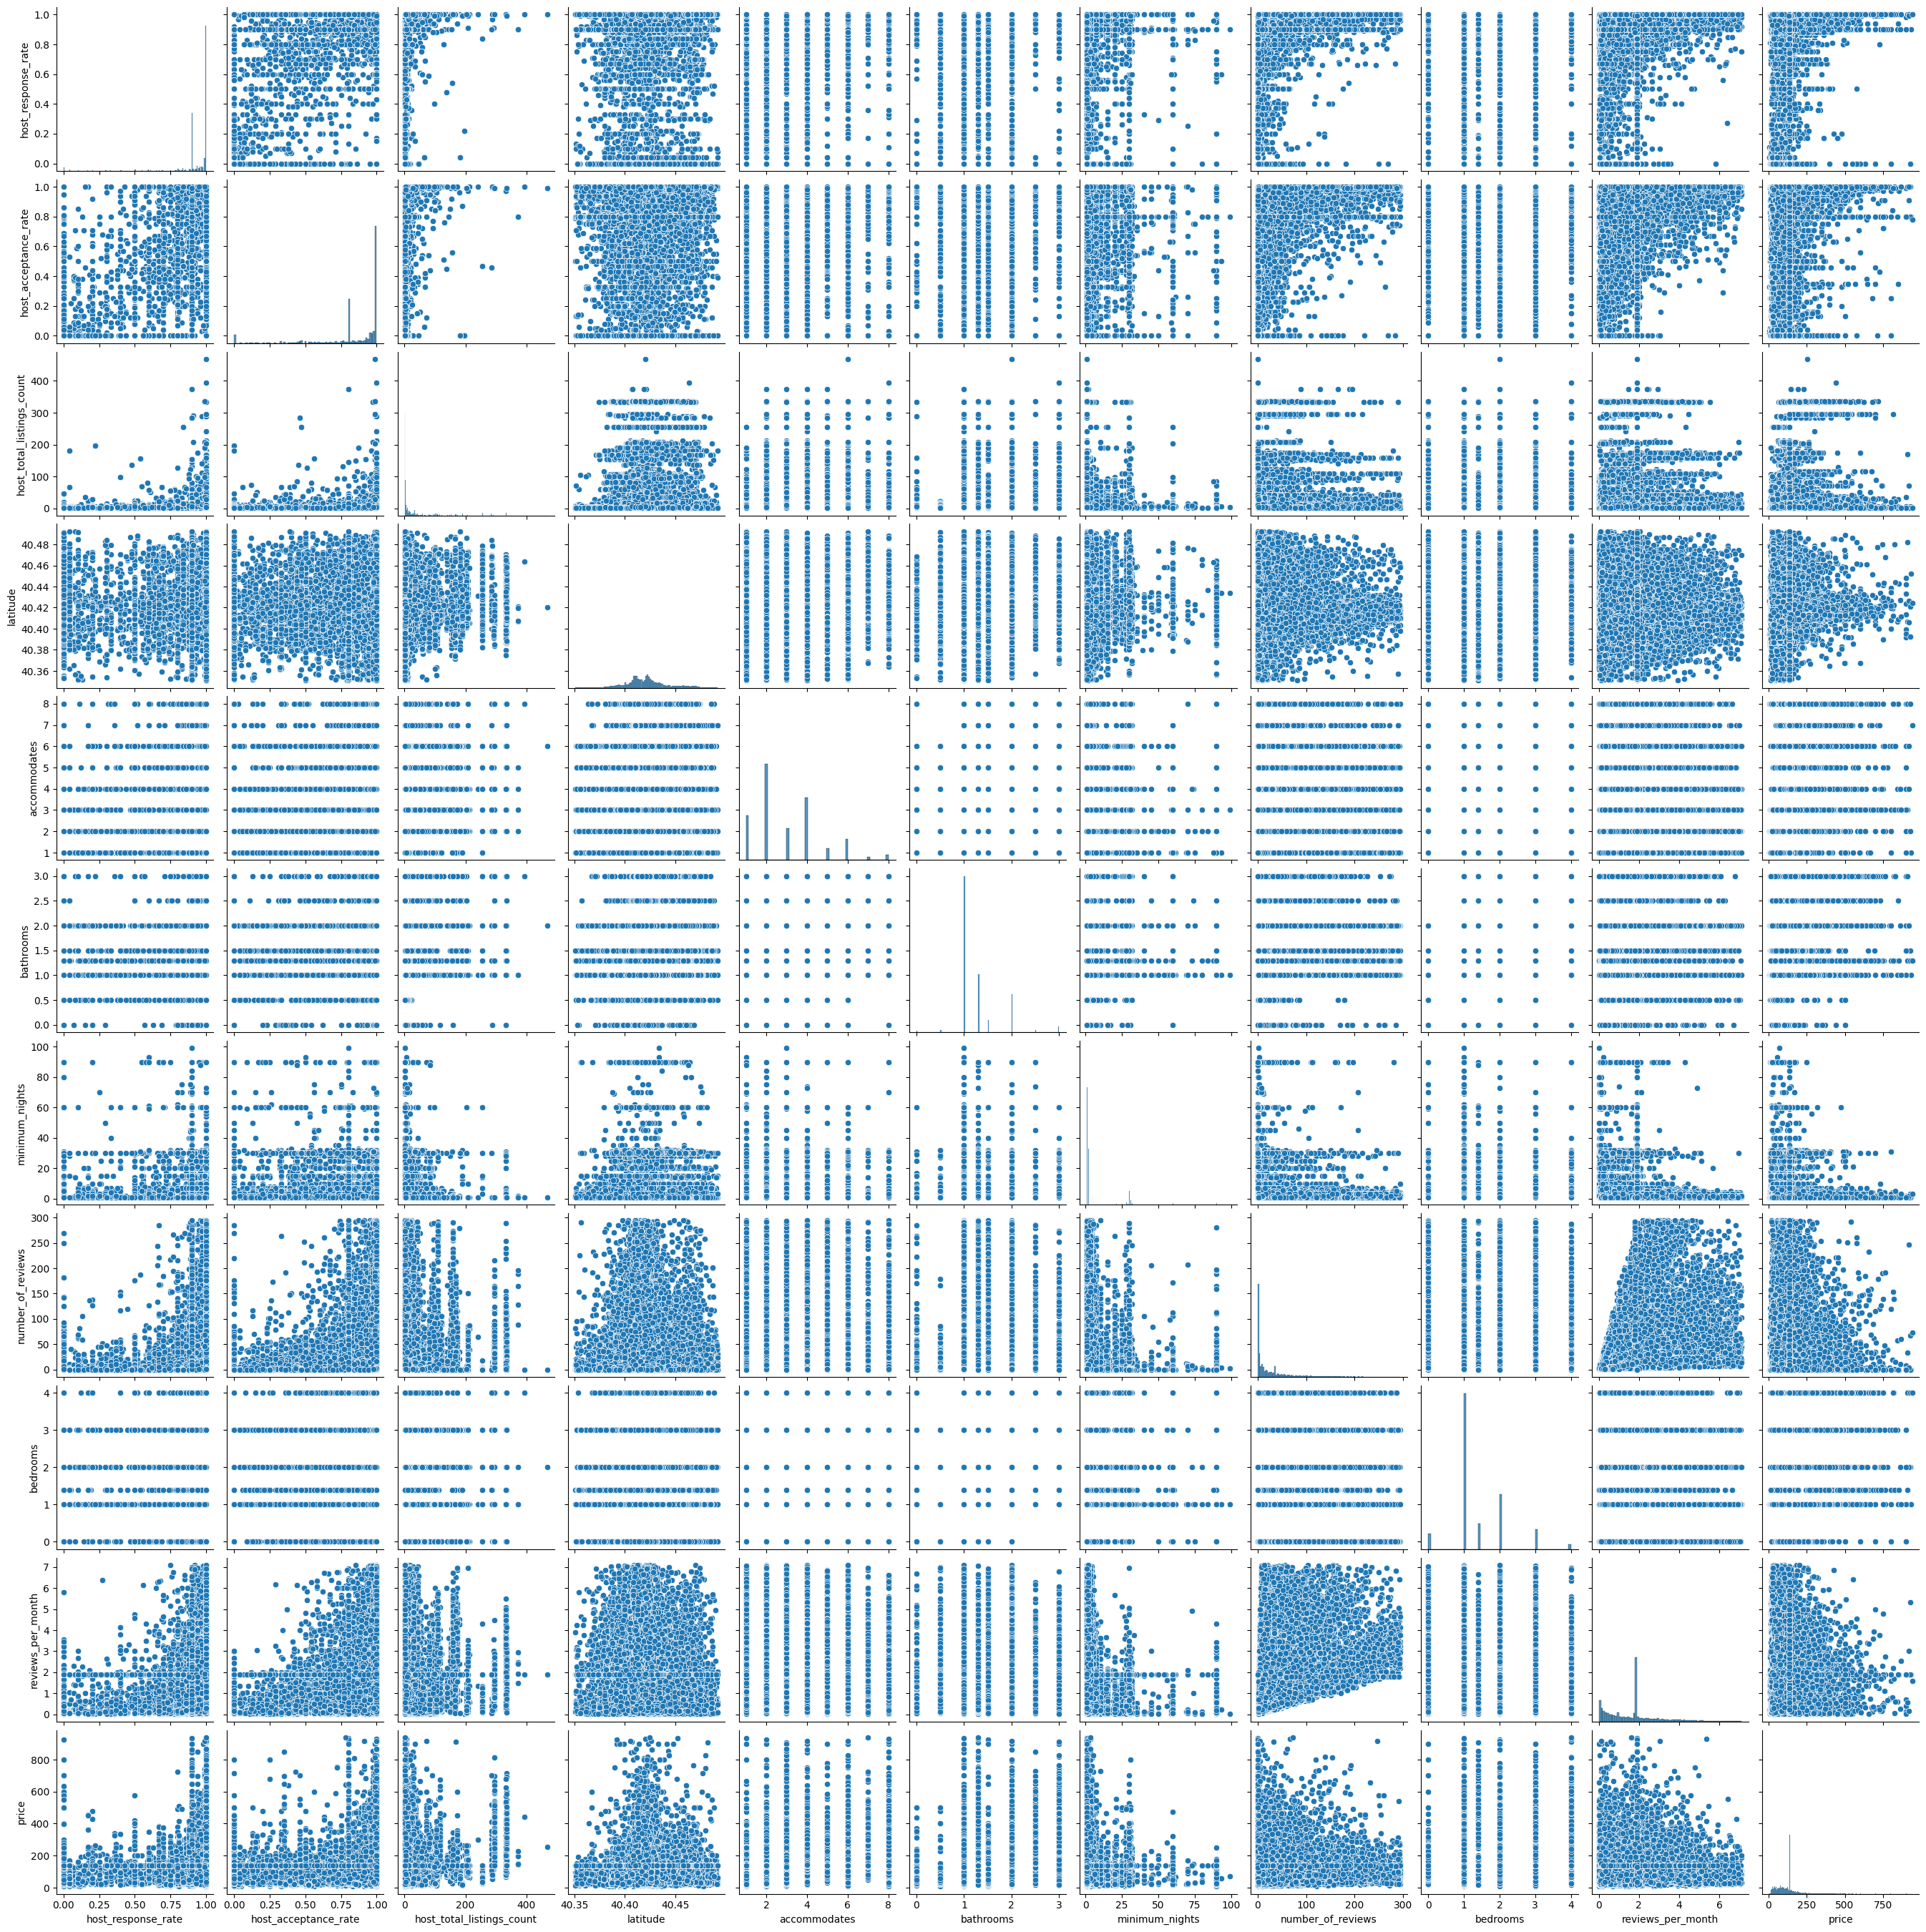

In [ ]:
sns.pairplot(madrid_variables)

            y = ax^2 + bx + c   ("Función cuadrática")

            y = a*exp(bx) + c   ("Función exponencial")

            y = 1/a*x           ("Función inversa")

            y = a*np.sin(x) + b ("Función senoidal")

            y = a*np.tan(x) + b ("Función tangencial")

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

            y = a*np.log(x) + b  (Función logaritmica)

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

            y = 1/a*x**2  (Función cuadrática inversa)

            y = a/b*x**2 + c*x (Función polinomial inversa)
          

MODELOS host_response_rate

In [6]:
#Declarar variables dependientes e independientes
Vars_Indep=madrid_variables[["price"]]
Var_Dep=madrid_variables[["host_response_rate"]]
x= Vars_Indep
y= Var_Dep

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, madrid_variables['price'], madrid_variables['host_response_rate'])
parametros, _ = curve_fit(func1, madrid_variables['price'], madrid_variables['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]

yfit1 = (a*x**2 + b)/ c*x
R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

0.6225886215956796

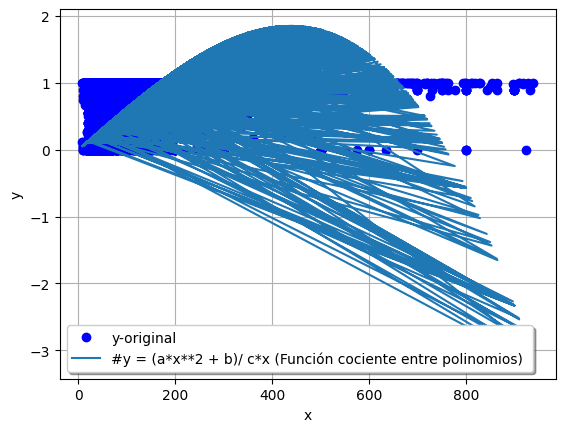

In [7]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios) ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

MODELOS host_acceptance_rate

In [8]:
Vars_Indep=madrid_variables[["price"]]
Var_Dep=madrid_variables[["host_acceptance_rate"]]
x= Vars_Indep
y= Var_Dep

#y = a/b*x**2 + c*x (Función polinomial inversa)

def  func2 (x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func2, madrid_variables['price'], madrid_variables['host_acceptance_rate'])

parametros, _ = curve_fit(func2, madrid_variables['price'], madrid_variables['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]

yfit2 = a/b*x**2 + c*x

R2 = r2_score(yfit2, y)
R2=abs(R2)
np.sqrt(R2)

0.7039884722255623

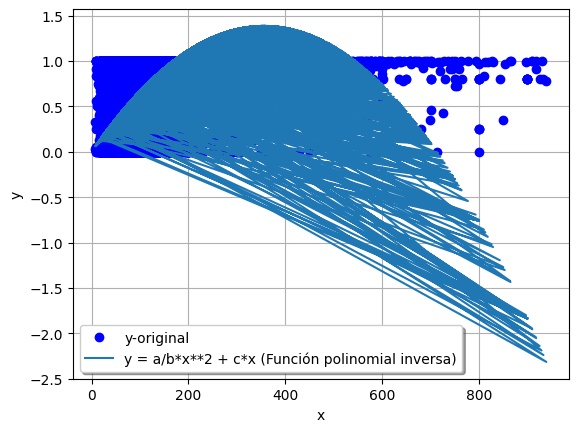

In [9]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="y = a/b*x**2 + c*x (Función polinomial inversa)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

MODELOS host_total_listings_count

In [55]:
#Declarar variables dependientes e independientes
Vars_Indep=madrid_variables[["bathrooms"]]
Var_Dep=madrid_variables[["host_total_listings_count"]]
x= Vars_Indep
y= Var_Dep

 #y = 1/a*x**2  (Función cuadrática inversa)
#y = a/b*x**2 + c*x (Función polinomial inversa)

def func1 (x, a, b, c):
     return (a*x**130 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, madrid_variables['bathrooms'], madrid_variables['host_total_listings_count'])

parametros, _ = curve_fit(func1, madrid_variables['bathrooms'], madrid_variables['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =  (a*x**130 + b)/ c*x

R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

0.14359978015059238

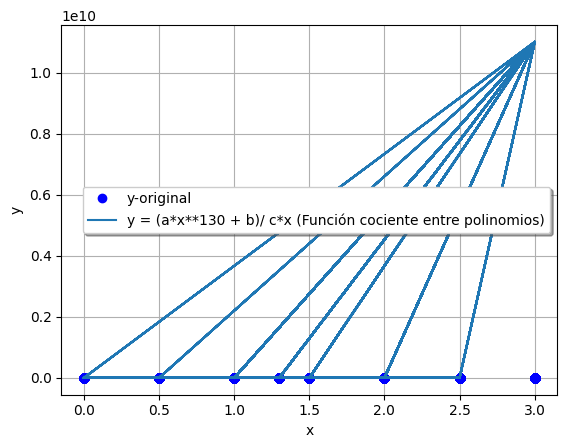

In [56]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**130 + b)/ c*x (Función cociente entre polinomios)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

MODELOS accommodates

In [15]:
#Declarar variables dependientes e independientes
Vars_Indep=madrid_variables[["price"]]
Var_Dep=madrid_variables[["accommodates"]]
x= Vars_Indep
y= Var_Dep

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, madrid_variables['price'], madrid_variables['accommodates'])

parametros, _ = curve_fit(func1, madrid_variables['price'], madrid_variables['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x

R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

0.4656960223962074

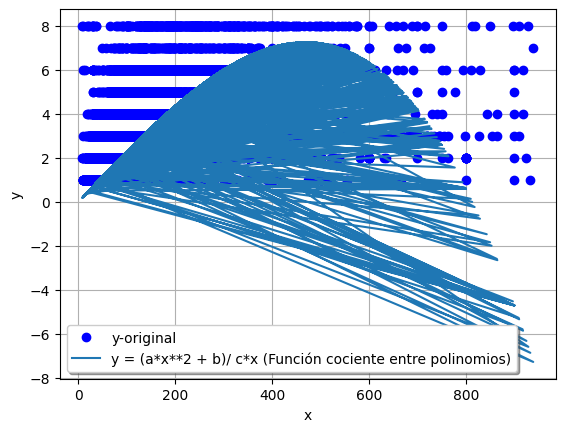

In [16]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

MODELOS reviews_per_month

In [57]:
#Declarar variables dependientes e independientes
Vars_Indep=madrid_variables[["bathrooms"]]
Var_Dep=madrid_variables[["reviews_per_month"]]
x= Vars_Indep
y= Var_Dep

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return (a*x**100 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, madrid_variables['bathrooms'], madrid_variables['reviews_per_month'])

parametros, _ = curve_fit(func1, madrid_variables['bathrooms'], madrid_variables['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**100 + b)/ c*x

R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

0.14359979861125716

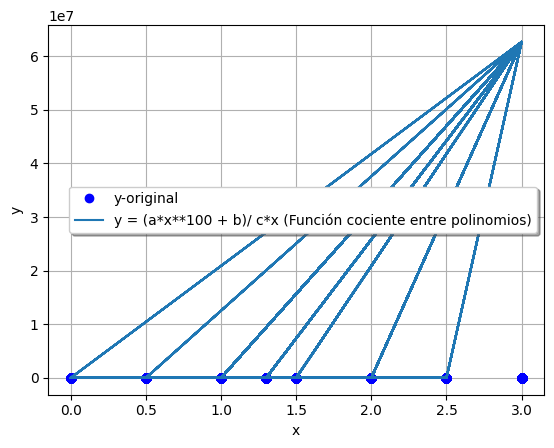

In [59]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**100 + b)/ c*x (Función cociente entre polinomios)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

MODELOS price

In [52]:
#Declarar variables dependientes e independientes
Vars_Indep=madrid_variables[["bedrooms"]]
Var_Dep=madrid_variables[["price"]]
x= Vars_Indep
y= Var_Dep

   # y = 1/a*x**2  (Función cuadrática inversa)
def  func1 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, madrid_variables['bedrooms'], madrid_variables['price'])

parametros, _ = curve_fit(func1, madrid_variables['bedrooms'], madrid_variables['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**2

R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

<ipython-input-52-a1f4a33835b2>:12: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, madrid_variables['bedrooms'], madrid_variables['price'])
<ipython-input-52-a1f4a33835b2>:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, madrid_variables['bedrooms'], madrid_variables['price'])


0.8157495130449653

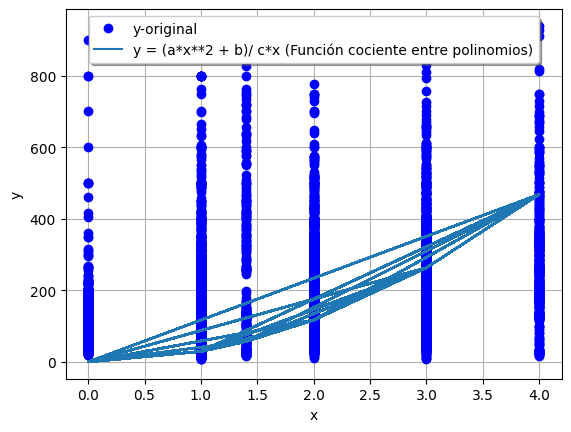

In [53]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()